# **2015 World Happiness Report Project**
---

### **Description**
In this project, you will use what you have learned so far about the machine learning process, Linear Regression, and KNN to analyze the official 2015 World Happiness Report from the United Nations. In particular, you will explore, wrangle, and visualize this data and then model the Happiness Score and Region of countries based on the variables reported in this dataset.

<br>


### **Overview**
For this project, you are given data collected for the 2015 UN Happiness Report. The 2015 Happiness Report, also known as the World Happiness Report 2015, is a publication that presents rankings of countries based on their levels of happiness and well-being. The report is a collaborative effort between the Sustainable Development Solutions Network (SDSN) and the Earth Institute at Columbia University, with contributions from various researchers and experts.

<br>

The report includes rankings of 158 countries based on the "World Happiness Index," which is calculated using survey data from the Gallup World Poll and other sources. The index combines factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption to assess overall happiness levels.

<br>

The 2015 Happiness Report sheds light on the relationship between happiness, well-being, and sustainable development, emphasizing the importance of incorporating measures of happiness into policy-making and development strategies. It provides valuable insights into global happiness levels, highlighting the factors that contribute to happiness and offering recommendations for policymakers and individuals to improve overall well-being.

<br>

 Everything you need is provided below. But, if you are curious to learn more the [official source can be found here](https://worldhappiness.report/ed/2015/#appendices-and-data). Here is a list of variables for your reference:

* `Country`: The country that the data corresponds to.

* `Region`: The region that this country is classified as belong to.

* `Happiness Score`: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* `GDP`: The extent to which GDP contributes to the calculation of the Happiness Score.

* `Social Support`: The extent to which Family contributes to the calculation of the Happiness Score

* `Health Life Expectancy`: The extent to which Life expectancy contributed to the calculation of the Happiness Score

* `Freedom`: The extent to which Freedom contributed to the calculation of the Happiness Score.

* `Corruption Perception`: The extent to which Perception of Corruption contributes to Happiness Score.

* `Generosity`: A model of the national average of response to the question “Have you donated money to a charity in the past month?” on GDP per
capita.

**NOTE**: All numerical variables except `Happiness Score` have already been standardized.

<br>

### **Key questions to answer**
1. How do these variables, such as `Generosity` or `Freedom`, influence a country's `Happiness Score`?

2. In 2015, which nation had the highest `Happiness Score`? Which nation had the lowest `Happiness Score`?

2. What patterns can be observed visually? What patterns can be observed with deeper data exploration?

3. Is Linear Regression or KNN better suited to this task of predicting Happiness Score or Region and why?

4. What is the best value of K for any case where you used KNN?

5. What role did feature selection play in the performance of models for both cases?

6. What variables play the largest role in predicting Happiness Score or Region?

<br>

### **Lab Structure**
**Part 1**:  [Data Exploration, Wrangling, and Visualization](#p1)

**Part 2**:  [Predicting Happiness Score](#p2)

> **Part 2.1**: [Using All Numerical Features](#p21)
>
> **Part 2.2**: [Using the 3 Best Numerical Features](#p22)
>
>
>

**Part 3**: [Predicting Region](#p3)

> **Part 3.1**: [Using All Numerical Features](#p31)
>
> **Part 3.2**: [Using the 2 Best Numerical Features](#p32)
>
>
>

</br>

### **Goals**
**By the end of this project, you will have:**
1. Cleaned, explored, and visualized this dataset.
2. Engineered a new feature and modeled it.
3. Decided when to use Linear Regression or KNN for different tasks.
4. Modeled several different variables and analyzed the results.

<br>


### **Cheat Sheets**

* [Python Basics](https://docs.google.com/document/d/1jC6zIdBukfEoJ8CesGf_usCtK2P6pJTWe5oxopC49aY/edit?usp=drive_link)

* [EDA with pandas](https://docs.google.com/document/d/1hMsWa7ziMulT0WjoCaqLTkpoqilCO12HlOrVy4-_zwY/edit?usp=drive_link)

* [Data Visualization with matplotlib](https://docs.google.com/document/d/1IA-sgjUvrQYyKlcBxFN-PIsHMEMrixwd6sh9RlMkubQ/edit?usp=drive_link)

* [Linear Regression with sklearn](https://docs.google.com/document/d/1uJueuaBhszyXJ1UeRZU25Ux6LgW7m7YtG1GA5x_O120/edit?usp=drive_link)

* [KNN with sklearn](https://docs.google.com/document/d/1X-aC73lEWaYwzzG9AQJCJSyCFxLvGf2rFnK6hlE_Gy8/edit?usp=drive_link)

<br>

**Run the cell below to import all necessary libraries and functions.**

In [2]:
!pip install numpy
!pip install pandas
!pip install matplot

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.8 MB/s eta 0:00:00a 0:00:01
doneeparing metadata (setup.py) ... 
doneing metadata (setup.py) ... 
doneing metadata (setup.py) ... 
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 14.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 44.3 MB/s eta 0:00:00
doneng wheel for SimpleWebSocketServer (setup.py) ... 
  Created wheel for SimpleWebSocketServer: filename=SimpleWebSocketServer-0.1.2-py3-none-any.whl size=9710 sha256=ca26e8917a52c9476e3b8adb9256da31f8e5f5b8b17360601b226f01a

ModuleNotFoundError: No module named 'sklearn'

<a name="p1"></a>

---
## **Part 1: Data Exploration, Wrangling, and Visualization**
---

In this part, you will load in and explore the dataset for this project. This will involve using functions from pandas as well as reading source material to understand the data that you are working with.

**NOTE**: In most real world situations, you will not do data exploration, wrangling, and visualization separately as we have done in the past. As such, you will simply be asked to perform tasks throughout this section without explicitly distinguishing between exploration, wrangling, and visualization.

<br>

**Run the code below to load in the data.**

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSUoGLZ90Qr6A5-DmdYD30CIEwMqIAmtWSbdcLgi10u5WoCtCuj_RuSm7wDsFsfcwPGRB6ZZDduCxpO/pub?gid=108149846&single=true&output=csv"

happy_df = pd.read_csv(url)

### **Problem #1.1**

Spend a few minutes getting familiar with the data. Some things to consider: how many instances are there? How many features? What are the features' datatypes?

In [5]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  163 non-null    object 
 1   region                   162 non-null    object 
 2   Happiness Score          162 non-null    float64
 3   GDP                      163 non-null    float64
 4   Social_support           163 non-null    float64
 5   Healthy Life_Expectancy  162 non-null    float64
 6   Freedom                  163 non-null    float64
 7   corruptionperception     163 non-null    float64
 8   Generosity               163 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.6+ KB


### **Problem #1.2**

This data currently has no consistent naming convention for columns, which is very bad practice. So, rename each column to be of the style, `'Column Name'`, where each word is separated by a space (not an underscore, slash, or anything else) and starts uppercase. Furthermore, make sure all words are spelled correctly.

<br>

**Hint**: It may make you life easier to quickly print the current column names here using the `.columns` attribute.

In [29]:
renaming = {}

happy_df.columns

Index(['Country', 'region', 'Happiness Score', 'GDP', 'Social_support',
       'Healthy Life_Expectancy', 'Freedom', 'corruptionperception',
       'Generosity'],
      dtype='object')

### **Problem #1.3**

Drop any duplicate rows.

In [9]:
happy_df.drop_duplicates(inplace = True)

### **Problem #1.4**

Determine the datatypes of each feature. Determine the number of non-null values in each column.

In [10]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  158 non-null    object 
 1   region                   157 non-null    object 
 2   Happiness Score          157 non-null    float64
 3   GDP                      158 non-null    float64
 4   Social_support           158 non-null    float64
 5   Healthy Life_Expectancy  157 non-null    float64
 6   Freedom                  158 non-null    float64
 7   corruptionperception     158 non-null    float64
 8   Generosity               158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 12.3+ KB


### **Problem #1.5**

You should have seen from Problem #1.4 that there are 3 columns with null values. We need to either impute by filling with the average or drop the rows with null values.


Let's deal with these columns by type, specifically:
1. Impute or drop the numerical null values.
2. Impute or drop the object (string) null values.

In [12]:
happy_df = happy_df.dropna(axis = 0, how='any', subset = happy_df.isna().any(axis=1)][# COMPLETE HIS LINE

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (330213414.py, line 1)

#### **1. Impute or drop the numerical null values.**

Complete the code below to *drop* the numerical null values. There's an argument for dropping or imputing, but dropping is a safer choice that does not rely on making any assumptions about these variables.

#### **2. Impute or drop the object (string) null values.**

Complete the code below to *impute* the object (string) null value(s). This is something we can look up, so it's completely reasonable to fill in the missing values manually and not have to sacrifice more data points.

<br>

**NOTE**: You will likely need to use the following three commands to accomplish this:

1. `happy_df[happy_df['column name'].isnull()]`: Print the specific data point(s) with a null value for `'column name'`.
2. `happy_df['column name'].unique()`: Print the possible values that we could use to fill in the null value found above.
3. `happy_df.loc[happy_df['column name'].isnull(), 'column name'] = 'non-null value'`: Fill in the null value with a new value. This should be the best option from the list of unique values found above.

In [13]:
 happy_df[happy_df.isna().any(axis=1)]

,Country,region,Happiness Score,GDP,Social_support,Healthy Life_Expectancy,Freedom,corruptionperception,Generosity
13,Austria,Western Europe,NaN,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
53,Moldova,Central and Eastern Europe,5.889,0.59448,1.01528,NaN,0.32818,0.01615,0.20951
64,Libya,NaN,5.754,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295


In [14]:
happy_df['Region'].unique()

KeyError: 'Region'

In [15]:
happy_df.loc[happy_df['Region'].insull(), 'Region'] = Middle East and Northern Africa'

SyntaxError: unterminated string literal (detected at line 1) (1538648667.py, line 1)

### **Problem #1.6**

Now that the data should be clean, take some time to understand the variables in this dataset, by looking at the [official statistical appendix/codebook here](https://files.worldhappiness.report/WHR15_Statistical_Appendix.pdf) and answering the multiple choice questions below.

You will only need to refer to the first 2.5 pages of information, until they start mentioning the "expanded data set". You do not need to read anything after this.

<br>

**1. Which of the following best describes the `Happiness Score`?**

>**a.** We can also call this measure the "life ladder”.

>**b.** We can also call this measure the “objective well-being”.

>**c.** This is a measure of how many ladders people own in a country on average. The more ladders, the happier the people.

>**d.** Respondents were asked how happy they were on a scale of 1 - 10.

<br>

**2. How is `Social Support` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “If you were in trouble, would you have support?”

>**d.** Respondents were asked, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

<br>

**3. How is `Freedom` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

>**d.** Respondents were asked, “How free are you?”

In [ ]:
D # ENTER YOUR ANSWER TO 1 HERE

In [ ]:
D # ENTER YOUR ANSWER TO 2 HERE

In [16]:
C # ENTER YOUR ANSWER TO 3 HERE

NameError: name 'B' is not defined

### **Problem #1.7**

Determine the average (mean) and standard deviation (std) of the numerical variables.

In [18]:
 happy_df.select_dtypes("number")

,Happiness Score,GDP,Social_support,Healthy Life_Expectancy,Freedom,corruptionperception,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
157,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
158,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
159,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
160,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


### **Problem #1.8**

Determine all the regions that were included in this dataset.

In [ ]:
‹

### **Problem #1.9**

Run the code below to create a new feature called `Region Encoded` that encodes the regions into numerical values. Although we have not discussed feature encoding yet, this will assist in completing the preprocessing stage of our data and prepare it for further analysis.

You will notice that a `Region Encoded` column has been added to the DataFrame. Each number in this column corresponds to a specific region:

`0: Western Europe `

`1: North America`

`2: Australia and New Zealand`

`3: Middle East and Northern Africa`

`4: Latin America and Caribbean`

`5: Southeastern Asia `

`6: Central and Eastern Europe`

`7: Eastern Asia`

`8: Sub-Saharan Africa`

`9: Southern Asia`




In [19]:
region_list = happy_df["Region"].unique()
region_map = {region_list[i]: i for i in range(len(region_list))}

happy_df['Region Encoded'] = happy_df['Region'].map(region_map)

happy_df.head()

KeyError: 'Region'

### **Problem #1.10**

Let's visualize some of the data and see if we can discover some relationships. Specifically, create bar graphs of `Happiness Score` for the countries in several different regions: `"Middle East and Northern Africa"`, `"Southern Asia"`, and `"North America"`.


**NOTE:** Some of the code has already been provided for the first example to help you get started.

In [23]:
happy_df.select_dtypes("number")

,Happiness Score,GDP,Social_support,Healthy Life_Expectancy,Freedom,corruptionperception,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
157,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
158,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
159,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
160,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


#### **Middle East and Northern Africa**

In [25]:
x = happy_df[happy_df["Region"] == "Middle East and Northern Africa"]["Country"]# COMPLETE THIS LINE
y = happy_df[happy_df["Region"] == "Middle East and Northern Africa"]["Happiness Scores"]# COMPLETE THIS LINE

plt.bar()# COMPLETE THIS LINE

plt.title("Happiness Score for countries in the Southern Asia")# COMPLETE THIS LINE
plt.xlabel("")# COMPLETE THIS LINE
plt.ylabel("")# COMPLETE THIS LINE
plt.xticks(rotation = 90)

plt.show()

KeyError: 'Region'

#### **Southern Asia**

#### **North America**

### **Problem #1.11**

Now, create scatter plots of `Happiness Score` on the y-axis versus several different numerical variables on the x-axis: `Social Support`, `Freedom`, and `GDP`.

#### **Happiness Score vs. Social Support**

In [30]:
plt.scatter(happy_df['Happiness Score'], happy_df['Social Support'])

KeyError: 'Social Support'

#### **Happiness Score vs. Freedom**

#### **Happiness Score vs. GDP**

AttributeError: module 'matplotlib.pyplot' has no attribute 'Show'

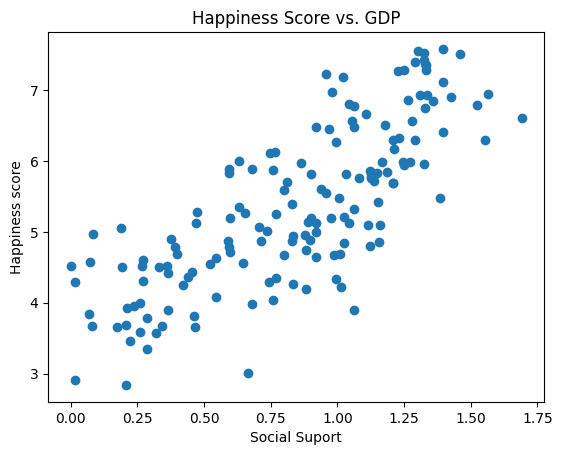

In [34]:
plt.scatter( happy_df['GDP'], happy_df['Happiness Score'])
plt.title("Happiness Score vs. GDP")
plt.xlabel("Social Suport")
plt.ylabel("Happiness score")
plt. Show()

### **Reflection Questions**
---
1. Is there a noticeable difference in happiness scores between different regions?
2. Does any region display a significant disparity between its country with the highest happiness score and its country with the lowest?
3. How do variables such as `Social Support`, `GDP`, and `Freedom` influence a country's happiness score? Do any variables seem to influence a country's happiness score more than others?
4. What are other relationships between variables that you think may be useful to visualize? What kind of data visualization graph would you use?
5. Consider the conceptual definitions of the features provided in the dataset. Are there any features that seem ambiguous or open to interpretation? How might these conceptual definitions impact the accuracy and reliability of the models when predicting happiness levels?
6. Reflect on the cultural and contextual factors that may influence the interpretation and relevance of the features in different countries. How might the meaning of a specific feature differ across diverse cultural and socioeconomic contexts?

<a name="p2"></a>

---
## **Part 2: Predicting Happiness Score**
---

Now you will create, evaluate, and train a machine learning model to predict the happiness score of a country based on the provided numerical features. It is up to you to determine if you should be using Linear Regression or KNN here.

<br>

You will do this two times as follows:

**Part 2.1**: Using All Numerical Features

**Part 2.2**: Using the 3 Best Numerical Features

<a name="p21"></a>

---
### **Part 2.1: Using All Numerical Features**
---

#### **Step #1: Load in the data**

This step was completed in Part 1!

#### **Step #2: Decide independent and dependent variables**

Complete the code below to decide the independent and dependent variables.

<br>

**NOTE**: The dependent variable (label) for all of Part 2 is `Happiness Score`. Using one of several pandas functions, you can determine the numerical features available and use them all as the independent variables.

In [26]:
happy_df.dtypes# COMPLETE THIS LINE

Country                     object
region                      object
Happiness Score            float64
GDP                        float64
Social_support             float64
Healthy Life_Expectancy    float64
Freedom                    float64
corruptionperception       float64
Generosity                 float64
dtype: object

In [ ]:
x = # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

#### **Step #4: Import the algorithm**

We are using `GDP`,	`Social Support`,	`Healthy Life Expectancy`, `Freedom`,	`Corruption Perception`, `Generosity`, and 	`Region Encoded` to predict `Happiness Score`. Which algorithm is best suited for this goal?

#### **Step #5: Initialize the model and set hyperparameters**

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [ ]:
model_1 = # COMPLETE THIS LINE

#### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.# COMPLETE THIS LINE TO TRAIN
predictions = model_1.# COMPLETE THIS LINE TO PREDICT

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

###### **KNN Visualization**

In [ ]:
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))

means = x.mean()
inputs = [[means[0], x, means[2], y, means[4], means[5], means[6]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_1.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Happiness Score'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

#### **Step #7: Evaluate the model's performance**

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

#### **Step #8: Use the model**

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

print(model_1.predict(# COMPLETE THIS LINE

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

##### **2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.**

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

#### **Reflection Questions**

1. Which machine learning algorithm was best suited for this section? Why?
2. Consider the strengths and limitations of the KNN model for predicting happiness levels in different countries. How does it handle categorical versus numerical features in the dataset?
3. Reflect on the ethical considerations and potential biases associated with using machine learning models to predict happiness levels. How might the choice between KNN and linear regression impact these considerations?


<a name="p22"></a>

---
### **Part 2.2: Using the 3 Best Numerical Features**
---
It's important to note that not all features in a dataset necessarily contribute positively to a machine learning model when predicting happiness levels. Some features may be irrelevant, noisy, or even introduce biases into the model. Therefore, careful feature selection or feature engineering is essential to ensure the model focuses on the most meaningful and influential factors.


#### **Step #1:** Load in the data

This step was completed in Part 1!

#### **Step #2: Decide independent and dependent variables**

Determining the appropriate number of features to choose for a KNN (K-Nearest Neighbors) model depends on several factors, including the size of your dataset, the dimensionality of the feature space, and the complexity of the problem you are trying to solve.

Remember that feature selection is not a one-time decision, but rather, an iterative process of experimentation and evaluation. Hence, it's important to try different combinations of features and assess the performance of your model each time.

To guide us in selecting features, let's start by looking at the correlations in the data. Identify 3 features that have the strongest correlations with the target variable, but low correlations with each other.

<br>

**NOTE**: `y` will be the same in all of Part 2.

In [36]:
happy_df.dtypes# COMPLETE THIS LINE

Country                     object
region                      object
Happiness Score            float64
GDP                        float64
Social_support             float64
Healthy Life_Expectancy    float64
Freedom                    float64
corruptionperception       float64
Generosity                 float64
dtype: object

In [ ]:
best_features = happy_df[[# COMPLETE THIS LINE
y = happy_df[# COMPLETE THIS LINE


When choosing the features for a model, we often want to choose those that have a strong correlation with the target variable (in this case, "Happiness Score") and are less correlated with each other to avoid multicollinearity.

From the given correlation matrix, the top three features that correlate with the "Happiness Score" are:

GDP: 0.781898
Social Support: 0.738371
Healthy Life Expectancy: 0.722515
Next, we check for correlation amongst these features themselves. "GDP" and "Healthy Life Expectancy" have a fairly high correlation of 0.815871. Therefore, including both these features could lead to multicollinearity.

To avoid this, we could choose to only include one of these in our model. Let's keep "GDP" because it has a higher correlation with "Happiness Score".

Now we need to choose another feature. "Freedom" seems to be a good choice because it is the next highest correlating feature with "Happiness Score" that isn't part of the initial trio and it also has relatively lower correlation with "GDP" and "Social Support".

So, the final three features to consider would be:

- GDP
- Social Support
- Freedom

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(best_features, # COMPLETE THIS LINE

#### **Step #4: Import the algorithm**

In [2]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

#### **Step #5: Initialize the model and set hyperparameters**

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [1]:
model_1 = LinearRegression() # COMPLETE THIS LINE

NameError: name 'LinearRegression' is not defined

### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_2.# COMPLETE THIS LINE TO TRAIN
predictions = model_2.# COMPLETE THIS LINE TO PREDICT

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

###### **KNN Visualization**

In [ ]:
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
means = x.mean()
inputs = [[x, y, means[2]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_2.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Happiness Score'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

#### **Step #7: Evaluate the model’s performance**

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

#### **Step #8: Use the model**

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4


<br>

**NOTE**: Since we selected only the top 3 features, you will need to only provide these 3 values for each prediction. Looking at the columns in the X data could be helpful here.

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

print(linear_model_2.predict(# COMPLETE THIS LINE

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

##### **2. Visualize the modeled relationship between `Happinesss Score` and one of the 3 features chosen to see if a qualitative relationship can be inferred.**

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_2.# COMPLETE THIS LINE
intercept = model_2.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

#### **Reflection Questions**

Now that you have trained several models to accomplish this task, answer the following questions:

1. Were there any hyperparameters you need to tune and, if so, what were the best values you found?
2. Did selecting a smaller number of features improve or decrease the performance of your model?
3. What 3 variables seem to play the largest role in determining `Happiness Score` based on your work in this part?

<a name="p3"></a>

---
## **Part 3: Predicting Region**
---

Now you will create, evaluate, and train a machine learning model to predict the region of a country based on the provided numerical features. It is up to you to determine if you should be using Linear Regression or KNN here.

<br>

You will do this two times as follows:

**Part 3.1**: Using All Numerical Features

**Part 3.2**: Using the 3 Best Numerical Features


<a name="p31"></a>

---
### **Part 3.1:** Using All Numerical Features
---

#### **Step #1: Load in the data**

This step was completed in Part 1!

#### **Step #2: Decide independent and dependent variables**

Complete the code below to decide the independent and dependent variables.

<br>

**NOTE**: The dependent variable (label) for all of Part 3 is `Region Encoded`. Using one of several pandas functions, you can determine the numerical features available and use them all as the independent variables.

In [ ]:
happy_df.# COMPLETE THIS LINE

In [ ]:
x = # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= .2,random_state= 42) # COMPLETE THIS LINE

NameError: name 'train_test_split' is not defined

#### **Step #4: Import the algorithm**

#### **Step #5: Initialize the model and set hyperparameters**

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [ ]:
model_1 = # COMPLETE THIS LINE

#### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.# COMPLETE THIS LINE TO TRAIN
predictions = model_1.# COMPLETE THIS LINE TO PREDICT

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

In [4]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

NameError: name 'plt' is not defined

###### **KNN Visualization**

In [5]:
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
means = x.mean()
inputs = [[means[0], x, means[2], y, means[4], means[5], means[6]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_1.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Region'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

NameError: name 'plt' is not defined

#### **Step #7: Evaluate the model’s performance**

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

In [6]:
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))

NameError: name 'r2_score' is not defined

#### **Step #8: Use the model**

Specifically,

1. Predict the region of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the region of these countries that reported the following results for their numerical measures:**

**Country 1**

* `Happiness Score`: 2.3
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 2**

* `Happiness Score`: 7.8
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 3**

* `Happiness Score`: 4.5
* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 1.1
* `Generosity`: 0.9

In [7]:
# COUNTRY 1
new country = pd. DataFrame([(0.9, 0.4, 0.8, 0.4, 0.2, 0.09, 011, columns = X test.columns)
print (model_1-predict (new_country))

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3950780141.py, line 2)

In [9]:
# COUNTRY 2
# COMPLETE THIS CODE
new_country = pd.DataFrame (110.9, 0.4, 0.8, .4, .2,.09,911, Columns = X_test.colums)
print model predict new country

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (4265404300.py, line 4)

In [10]:
# COUNTRY 3
# COMPLETE THIS CODE
new_country = pd.Dataframe 1/3.2g92.03, 9,-3,-9,4JJ, colunns = x_test.coluans)
print model.predict new country

SyntaxError: invalid decimal literal (2925132884.py, line 3)

##### **2. Visualize the modeled relationship between `Region` and `Healthy Life Expectancy` to see if a qualitative relationship can be inferred.**

In [12]:
# COMPLETE THIS CODE
plt.yticks(ticks = range(10), labels = happy_df['Region' ].unique())
plt. show()


NameError: name 'plt' is not defined

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [13]:
print("Coefficients:")
coefficients.head()

Coefficients:


NameError: name 'coefficients' is not defined

In [ ]:
print("\nIntercept:")
intercept.head()

<a name="p32"></a>

---
### **Part 3.2: Using the 2 Best Numerical Features**
---

#### **Step #1: Load your data**

This step was already done previously.

#### **Step #2: Decide independent and dependent variables**

Examine the correlations to select the 2 best numerical features.

<br>

**NOTE**: `y` will be the same in all of Part 3.

In [ ]:
happy_df.# COMPLETE THIS LINE

In [ ]:
best_features = happy_df[[# COMPLETE THIS LINE
y = happy_df[# COMPLETE THIS LINE

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(best_features, # COMPLETE THIS LINE

#### **Step #4: Import the algorithm**

#### **Step #5: Initialize the model and set hyperparameters**

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [ ]:
model_2 = # COMPLETE THIS LINE

#### **Step #6: Fit your model and make a prediction. Create a visualization if applicable**

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_2.# COMPLETE THIS LINE TO TRAIN
predictions = model_2.# COMPLETE THIS LINE TO PREDICT

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

###### **KNN Visualization**

In [ ]:
labels = happy_df['Region'].unique()
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Region'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

#### **Step #7: Evaluate the model's performance**

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

#### **Step #8: Use the model**

Specifically,

1. Predict the region of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the region of these countries that reported the following results for their numerical measures:**

**Country 1**

* `Happiness Score`: 2.3
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 2**

* `Happiness Score`: 7.8
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 3**

* `Happiness Score`: 4.5
* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 1.1
* `Generosity`: 0.9

<br>

**NOTE**: Since we selected only the top 2 features, you will need to only provide these 2 values for each prediction. Looking at the columns in the X data could be helpful here.

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

region = model_2.predict(# COMPLETE THIS LINE
print(happy_df['Region'].unique()[region[0]])

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

##### **2. Visualize the modeled relationship between `Region` and `Healthy Life Expectancy` to see if a qualitative relationship can be inferred.**

In [ ]:
# COMPLETE THIS CODE

plt.yticks(ticks = range(10), labels = happy_df['Region'].unique())

plt.show()

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

#### **Reflection Questions**

Now that you have trained several models to accomplish this task, answer the following questions:

1. Is Linear Regression or KNN better suited to this task? Why?
2. Were there any hyperparameters you need to tune and, if so, what were the best values you found?
3. Did selecting a smaller number of features improve or decrease the performance of your model?
4. What 2 variables seem to play the largest role in determining `Region Encoded` based on your work in this part?



---
© 2025 The Coding School, All rights reserved